<a href="https://colab.research.google.com/github/ggug0125-ui/AI_26/blob/main/04_02_%ED%99%95%EB%A5%A0%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 마켓에 럭키백 성공으로 인해서 각각의 지역에서 수산물을 제공하기로 하였다
# 영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라
# 머신러닝 모델을 학습할 수 있게 훈련데이터를 제공하고 있다.
# 하지만, 수산물을 제공하는 곳이 너무 많아서
# 샘플을 골라내는 일이 너무 힘들가. 추가되는 수산물의 샘플도 없다.
# 영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야 한다.

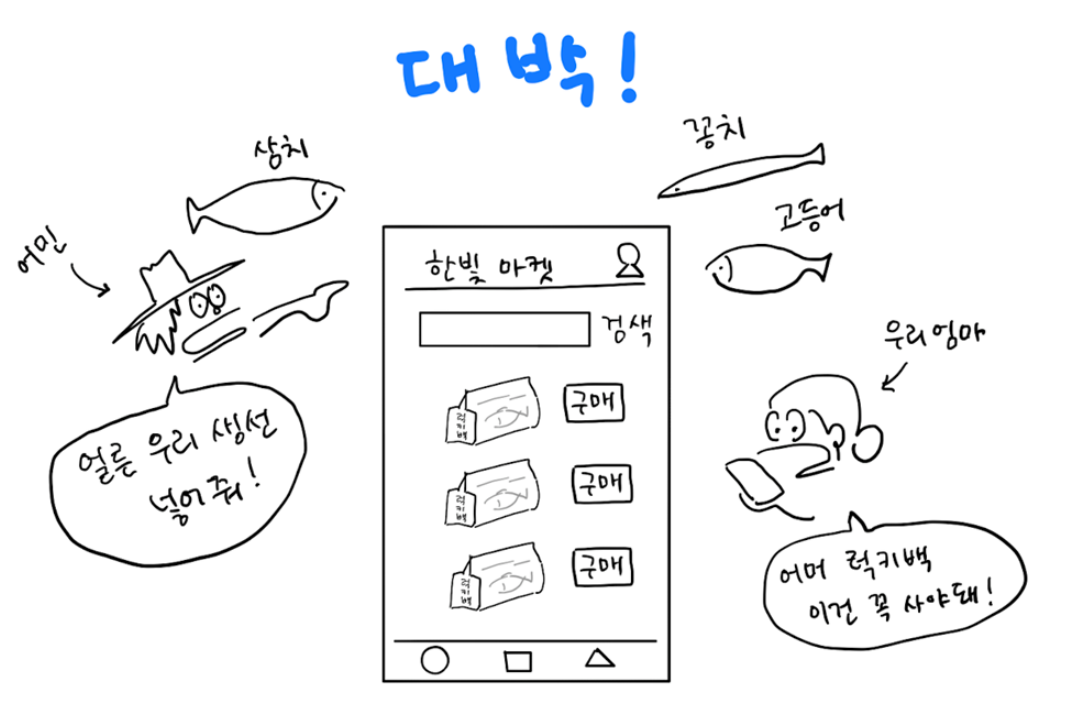

In [ ]:
# 점진적 학습
# 당면한 문제 :  훈련데이터가 한번에 준비되는 것이 아니라. 조금씩 전달됨
# 해결법1 :  기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련
# 단점 1 :  시간이 지날수록 데이터가 늘어남
#         -> 인력추가, 서버증설, 시간적 여유가 줄어듬 -> 지속가능 할까??

# 해결법2 : 새로운데이터를 추가할 때마다 이전 데이터를 버림
#           훈련데이터 크기를 일정하게 유지하는 방법
# 단점 2 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선 데이터가 포함되면??

# 해결법3 : 점진적 학습 방법
# (온라인 학습, 훈련한 모델을 버리지 않고 조금씩 더 새로운 데이터를 학습)
# -> 확률적 경사 하강법

In [ ]:
# 확률적 경사 하강법 ( 실제 산에서 내려오는 것 처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
# 확률적 :  무작위, 랜덤(훈련 세트에서 랜덤하게 하나의 샘플을 고름)
# 경사 : 기울기
# 하강 : 내려가는
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 내려감
# 위 방법을 반복수행 -> 에포크
# 만약 모든 샘플을 다 사용해도 다 내려오지 못할 경우
#   처음부터 다시 시작함
#   훈련세트에서 모든 샘플을 다시 채워 넣음
#   다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감
# 만족할만한 위치에 도달 할 때까지 계속 내려감
# 훈련세트를 한번 모두 사용하는 과정을 에포크(epoch)라고 함
# 일반적인 경사 하강법은 수십, 수백번 이상 에포크를 수행함
# 만약, 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을 때 집으로 돌아가려면
# 등산로의 입구까지 내려가야 한다.
# 만약 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택하는것이 최선임
# 가장 빠른 길은 경사가 가장 가파른 길~!!

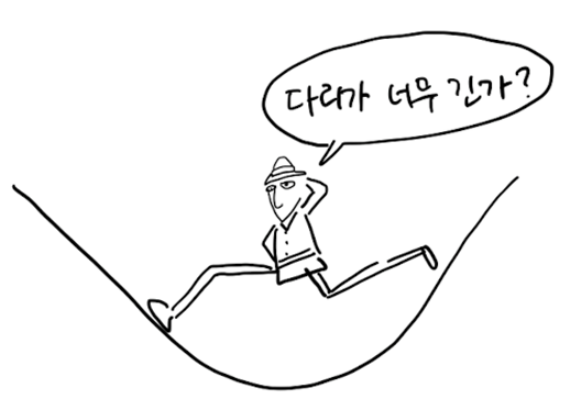

In [ ]:
# 실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다. -> 경사 하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요함 - > 훈련법
# 훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾을것~!!
# 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾음
# -> 확률적
# 결론 :  훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 씩 내려건 다음 훈련세트에서
# 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금씩 내려감 -> 전체 샘플을 모두 사용할 때까지 진행

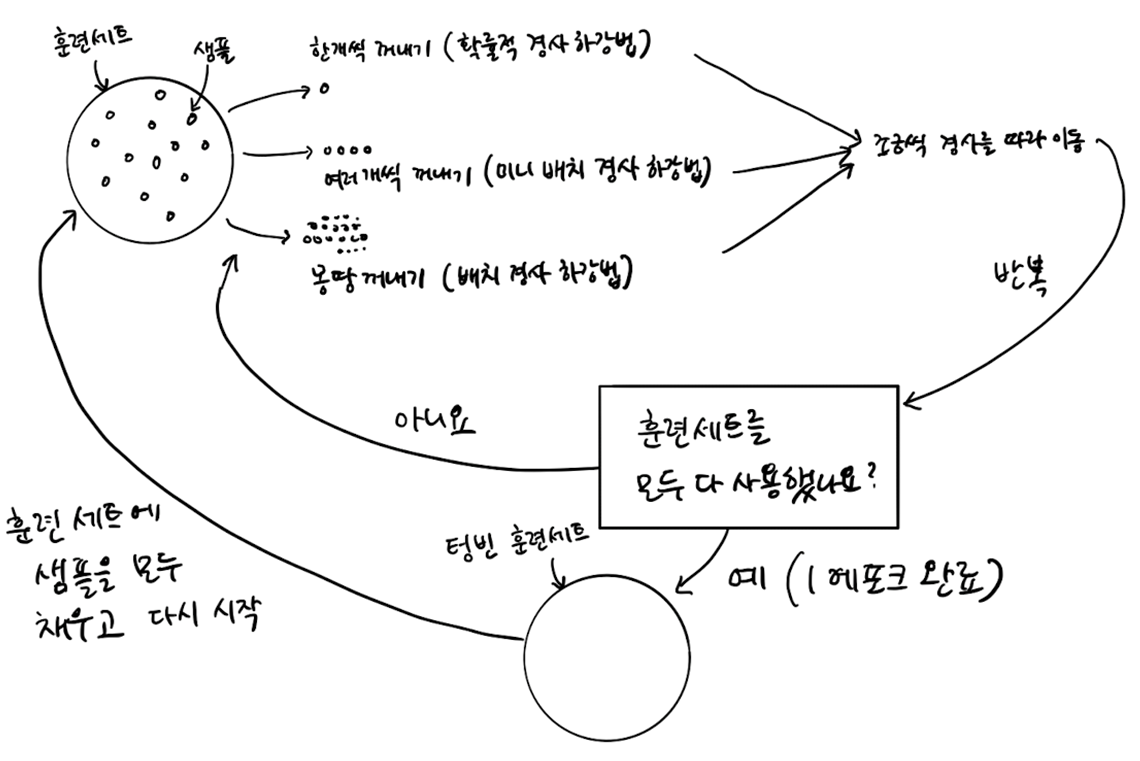

In [ ]:
# 위 방법대로 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
# 이러한 문제점을 해소하려고 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면
#       미니 배치 경사하강법 : 여러개의 샘플을 사용해서 경사하강진행
#       배치 경사하강법      : 극단적으로 한번 경사를 따라 이동(전체 샘플 사용)
#                        단점: 컴퓨터 자원을 너무 많이 사용한다.
#                        한번에 전체 데이터를 모두 읽을 수 있다.
# 확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동
# 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트가 되어도 학습을 이어 나갈수 있다.
# 다시 산꼭대기 부터 시작할 필요가 없다 -> 신경망 알고리즘을 사용한다

# 손실 함수 (Loss function) -> 머신런닝 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을수록 좋음)
#                           -> 하지만 어떤 값이 최소값인지 알지 못함.
#                           -> 가능한 많이 찾아보고 만족할 만한 수준이면 인정해야 함
#                           -> 이 값을 찾아서 조금씩 이동
# 손실 함수 공식 : Loss = -log(p) -> p = 모델이 "1" 이라고 예측한 확률

# 비용 함수 (Cost function) -> 손실함수의 다른말. (손실함수는 샘플 하나의 대한 손실을 정의)
#                           -> 비용함수는 훈련세트에 있는 모듬 샘플에 대한 손실함수의 합

# 분류에서 손실은 정잡을 못 맞히는 것~!!

# 에포크(epoch : 시대)  -> 훈련세트를 한번 모두 사용하는 과정

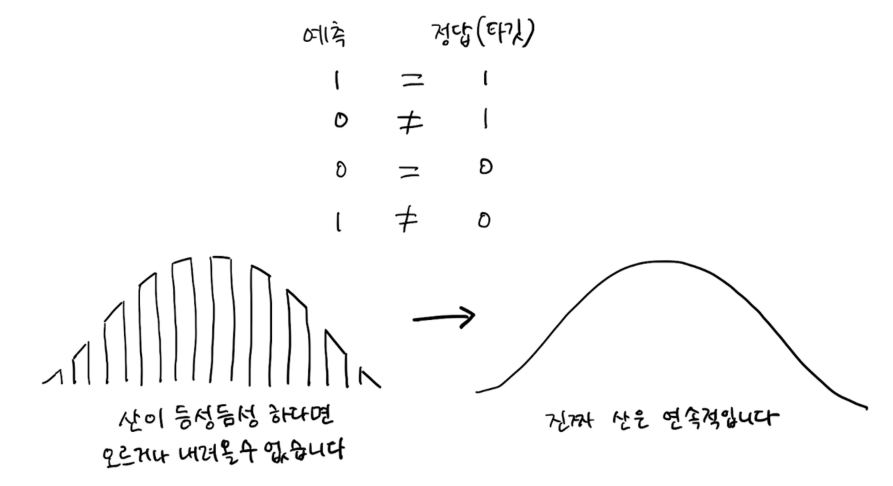

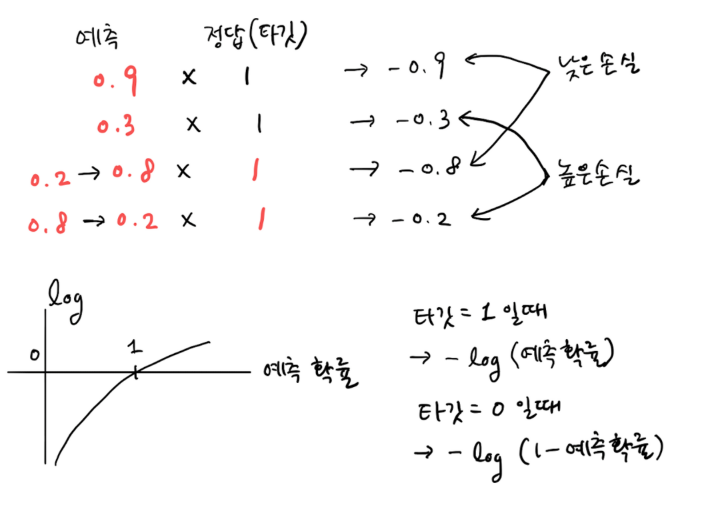

In [ ]:
# 정답이 1인데
# 모델이 높은 확률 (0.9, 0.8) 로 맞추면 -> 손실이 작다
# 모델이 낮은 확률 (0.3, 0.2) 로 맞추면 -> 손실이 크다

# 로그값이 0~1 사이에서 항상 음수이기 때문에
# log(0.9) ≈ -0.1
# log(0.2) ≈ -1.6
# 그래서 손실은 앞에 마이너스를 붙여서 양수로 바꿔줍니다.

In [1]:
import pandas as pd
# pandas 라이브러리 불러오기
# 표 형태 데이터(CSV, 엑셀 등)를 다루기 위한 라이브러리

fish = pd.read_csv('https://bit.ly/fish_csv_data')
# 인터넷에 있는 CSV 파일을 읽어서
# pandas의 DataFrame(표 구조 데이터)으로 저장
# fish 변수 안에 물고기 데이터 전체가 들어감

fish.head()  # fish에 있는 리스트 위에 5개 출력
# 데이터의 상위 5개 행(row)만 출력
# 데이터 구조(컬럼 이름, 값 형태)를 빠르게 확인할 때 사용
# → 어떤 특성들이 있는지 확인하는 첫 단계

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# species(어종)을 제외한 나머지 필드를 fish_input 변수에 리스트를 넣음
# fish 데이터프레임에서 입력(feature)으로 사용할 컬럼만 선택
# → Weight, Length, Diagonal, Height, Width
#
# [['컬럼들']] : 여러 열(column) 선택
# to_numpy()   : pandas DataFrame → numpy 배열로 변환
# (scikit-learn 모델은 numpy 형태를 주로 사용)

# 즉,
# fish_input = 물고기의 특징 정보(X 데이터)

fish_target = fish['Species'].to_numpy()  # Species(어종) 정답파일 생성
# 'Species'(어종) 컬럼만 선택
# → 우리가 맞춰야 할 정답(label, y 데이터)
#
# 한 개 컬럼이므로 ['Species'] 형태 사용 (1차원 배열 생성)

print(fish_target)
# 모든 물고기의 어종(label) 출력

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [3]:
from sklearn.model_selection import train_test_split
# 데이터를 훈련용(train)과 테스트용(test)으로 나누는 함수

import numpy as np # numpy 라이브러리 불러오기 (배열 계산 및 출력 설정용)
np.set_printoptions(precision=6, suppress=True)
# numpy 배열 출력 형식 설정
#
# precision=6  → 소수점 6자리까지 표시
# suppress=True → 과학적 표기법(1.23e+03 같은 형태) 사용 안 함
# → 숫자를 사람이 보기 쉽게 출력하도록 설정

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
# 전체 데이터를 훈련 세트와 테스트 세트로 분리
#
# fish_input  → 입력 데이터(X)
# fish_target → 정답 데이터(y)
#
# 결과:
# train_input   : 모델 학습용 입력 데이터
# test_input    : 모델 평가용 입력 데이터
# train_target  : 학습용 정답(어종)
# test_target   : 테스트용 정답
#
# random_state=42
# → 실행할 때마다 동일하게 데이터가 나뉘도록 고정

print('train_input')
print(train_input)
# 훈련용 입력 데이터 전체 출력
# 각 행(row)은 한 마리 물고기
# 각 열(column)은 [Weight, Length, Diagonal, Height, Width]

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [4]:
print(train_input.shape)  # 요소 119개, 특성 5
# 머신러닝에서 거의 매번 확인하는 가장 기본 체크


(119, 5)


In [5]:
print('test_input')
print(test_input)

test_input
[[  78.       18.7      19.4       5.1992    3.1234]
 [  13.4      12.4      13.5       2.43      1.269 ]
 [ 200.       32.3      34.8       5.568     3.3756]
 [ 270.       26.       28.7       8.3804    4.2476]
 [ 150.       23.       24.5       5.2185    3.626 ]
 [1000.       37.       42.6      18.957     6.603 ]
 [   7.       10.6      11.6       1.7284    1.1484]
 [ 180.       25.2      27.9       7.0866    3.906 ]
 [ 188.       24.6      26.2       6.7334    4.1658]
 [1250.       56.       59.7      10.6863    6.9849]
 [ 650.       33.5      38.7      14.4738    5.7276]
 [1000.       40.       43.5      12.354     6.525 ]
 [ 600.       32.       37.2      15.438     5.58  ]
 [ 150.       20.       22.4       8.8928    3.2928]
 [ 700.       35.       40.5      16.2405    5.589 ]
 [ 920.       38.5      44.1      18.0369    6.3063]
 [1000.       43.5      46.       12.604     8.142 ]
 [ 218.       26.5      28.        7.168     4.144 ]
 [ 225.       24.       25.5       

In [6]:
print(test_input.shape) # 40개, 5특성
# 머신러닝에서 거의 매번 확인하는 가장 기본 체크

(40, 5)


In [13]:
# 훈련용 119개, 5특성, 테스트용 40개 5특성

# 정답리스트를 보자
print('train_target : '+ train_target) # 훈련정답 119개


['train_target : Bream' 'train_target : Pike' 'train_target : Smelt'
 'train_target : Perch' 'train_target : Parkki' 'train_target : Roach'
 'train_target : Perch' 'train_target : Bream' 'train_target : Perch'
 'train_target : Perch' 'train_target : Perch' 'train_target : Bream'
 'train_target : Perch' 'train_target : Parkki' 'train_target : Perch'
 'train_target : Bream' 'train_target : Smelt' 'train_target : Perch'
 'train_target : Roach' 'train_target : Bream' 'train_target : Pike'
 'train_target : Bream' 'train_target : Pike' 'train_target : Perch'
 'train_target : Parkki' 'train_target : Bream' 'train_target : Perch'
 'train_target : Pike' 'train_target : Bream' 'train_target : Perch'
 'train_target : Parkki' 'train_target : Roach' 'train_target : Perch'
 'train_target : Bream' 'train_target : Roach' 'train_target : Perch'
 'train_target : Bream' 'train_target : Bream' 'train_target : Perch'
 'train_target : Perch' 'train_target : Roach' 'train_target : Pike'
 'train_target : Perc

In [14]:
print(test_target) # 테스트 정답 40개

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [22]:
from sklearn.preprocessing import StandardScaler
# 데이터 스케일(크기)을 맞추기 위한 전처리 도구 불러오기

ss = StandardScaler()
# StandardScaler 객체 생성
# → 평균 0, 표준편차 1로 변환(표준화)

ss.fit(train_input)
# 훈련 데이터(train_input)의 평균(mean)과 표준편차(std)를 계산
# ⚠️ 반드시 train 데이터로만 fit 해야 함 (데이터 누수 방지)

train_scaled = ss.transform(train_input)
# 훈련 데이터를 표준화
# (값 - 평균) / 표준편차 방식으로 변환됨

test_scaled = ss.transform(test_input)
# 테스트 데이터도 동일한 기준(훈련 데이터 평균/표준편차)으로 변환
# → 모델이 같은 기준으로 데이터를 보도록 맞춤

print(train_scaled[:5])
# 표준화된 훈련 데이터 중 앞 5개 샘플 출력
# 값이 0 근처로 분포하는 것을 확인 가능

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [23]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [24]:
from sklearn.linear_model import SGDClassifier
# 확률적 경사하강법(Stochastic Gradient Descent) 기반 분류 모델 불러오기
# → 데이터를 하나씩 보면서 가중치를 조금씩 수정하며 학습하는 모델

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
# SGDClassifier 객체 생성
#
# loss='log_loss'
# → 로지스틱 회귀 방식 사용 (확률 기반 분류)
# → sigmoid 함수를 이용해 클래스 확률 계산
#
# max_iter=10
# → 전체 훈련 데이터를 10번 반복 학습(epoch = 10)
# → 현재는 반복 횟수가 적어서 학습이 충분하지 않은 상태
#
# random_state=42
# → 실행할 때마다 동일한 결과가 나오도록 랜덤 고정

sc.fit(train_scaled, train_target) # 학습 시작
# 모델 학습 시작
#
# train_scaled : 표준화된 입력 데이터 (특성 값)
# train_target : 정답(물고기 종류)
#
# SGD 동작 방식:
# 데이터 1개 선택 → 예측 → 오차 계산 → 가중치 수정 → 반복

print(sc.score(train_scaled, train_target)) # 77.31 %
# 훈련 데이터 정확도 출력
# → 모델이 공부한 데이터에서 얼마나 맞추는지 확인
# 현재 약 77% 정도 (학습이 덜 된 상태)

print(sc.score(test_scaled, test_target))   # 77.5 %  -> 반복횟수 부족으로 max_iter를 향상후 훈련
# 테스트 데이터 정확도 출력
# → 모델이 처음 보는 데이터에서의 실제 성능
# 현재 약 77.5% (epoch 부족으로 성능 낮음)

# 👉 해결 방법:
# max_iter 값을 증가시키면 더 오래 학습하면서 성능 향상 가능

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [25]:
# 확률적 경사 하강법은 점진적 학습이 가능하다라고 했음
# SGDClassifier 객체를 또 만들지 말고 훈련할 모델을 sc로 추가하여 훈련을 추가한다.
sc.partial_fit(train_scaled, train_target)  # 부분적인(partial) 학습
# partial_fit() = "부분 학습(추가 학습)" 함수
#
# 이미 학습된 sc 모델을 초기화하지 않고,
# 기존 상태(가중치)를 유지한 채로 한 번 더 학습을 이어서 진행함
#
# SGD 모델은 원래 데이터를 여러 번 반복해서 조금씩 개선하는 방식이라
# partial_fit을 여러 번 호출하면 epoch를 늘리는 효과가 생김
#
# 쉽게 말하면:
# fit()  : 처음부터 학습 시작(처음 세팅)
# partial_fit(): 이어서 계속 학습(추가로 더 공부)

print(sc.score(train_scaled, train_target)) # 79.83%
# 추가 학습 후 훈련 데이터 정확도 출력
# → 이전보다 올라가면 "더 학습이 진행됨"을 의미
# (예: 77% → 79.83% 처럼 상승)

print(sc.score(test_scaled, test_target))   # 77.5% -> 정확도가 향상되고 있음.
# 퍼센트가 증가 함 -> 무작정 부분적인 학습을 계속하는 것은 의미가 없음 -> 기준점을 제공해야 함
# 현재는 등산 내려오다가 정지된 느낌

0.7983193277310925
0.775


In [ ]:
# 에포크와 과대/과소적합
# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소,과대 적합이 될 수 있다.
# 에포크 횟수가 적으면 훈련 세트를 덜 학습된다. (119개에서 10번만 랜덤추출하고 정지)
# 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다.(good)

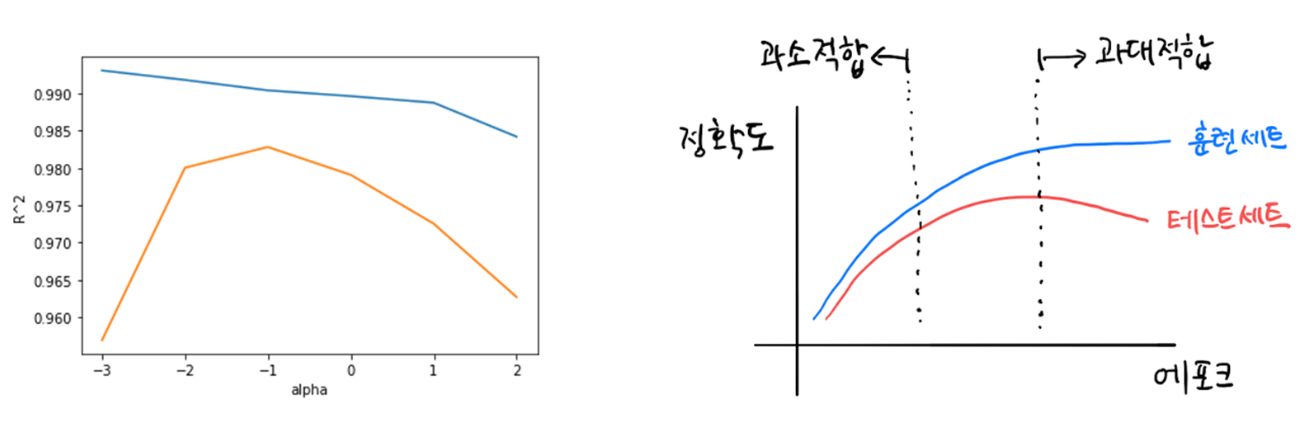

In [ ]:
# 바꾸어 말하면 적은 에포크 횟수 동안에 훈련된 모델은 훈련세트와 테스트 세트에 맞지 않음(과소적합)
# 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁨 (과대적합)

# 과대 적합이 되기전에 훈련을 멈추는 것을 조기 종료~!!

In [26]:
import numpy as np # numpy를 np라는 별명으로 불러옴 (배열/수치 계산 도구)

sc = SGDClassifier(loss='log_loss', random_state=42)
# SGDClassifier(확률적 경사하강법 분류기) 모델을 만듦
# loss='log_loss' : 로지스틱 회귀(확률 기반 분류) 방식으로 학습하겠다는 의미
# random_state=42 : 결과가 매번 똑같이 나오도록 랜덤 시드 고정


train_score = []  # 훈련세트 점수를 누적하는 빈 리스트
# 매 에포크마다 "훈련 데이터에서 점수가 몇 점인지" 저장하려고 비워둠

test_score = [] # 테스트 세트 점수를 누적하는 빈 리스트
# 매 에포크마다 "테스트 데이터에서 점수가 몇 점인지" 저장하려고 비워둠
# train_target에 있는 7개의 생선목록을 제공

classes = np.unique(train_target)
# train_target(정답 라벨)에 들어있는 "종류(클래스)"를 중복 없이 뽑음
# 예: ['Bream','Perch','Pike', ...] 같은 7개 어종 목록
# partial_fit은 처음 학습할 때 전체 클래스 목록을 꼭 알려줘야 안전하게 학습함

# 파이썬의 _ 변수는 1회용
for _ in range(0, 300): # 300번의 에포크 동안 훈련 진행
# 에포크(epoch) = "훈련 데이터를 한 번 학습하는 단위"
# 여기서는 partial_fit을 300번 반복해서 조금씩 계속 업데이트하는 구조
# _ 는 “반복 횟수 값이 필요 없어서” 그냥 버리는 1회용 변수

    sc.partial_fit(train_scaled, train_target, classes=classes)
    # partial_fit = "조금씩 이어서 학습"하는 함수
    # 한 번 호출될 때마다 모델이 가중치를 조금 업데이트함
    # classes=classes는 첫 호출 때 특히 중요: 가능한 정답 종류를 미리 알려줌

    # 반복마다 훈련세트와 테스트 세트의 점수를 계산 하여 train_score와 test_score 리스트에 추가함
    train_score.append(sc.score(train_scaled, train_target))    # 훈련세트점수를 빈 리스트에 추가
    # sc.score(X, y) = 현재 모델의 정확도(분류면 accuracy)를 계산
    # 지금 모델이 훈련 데이터에서 얼마나 맞추는지 기록(누적)

    test_score.append(sc.score(test_scaled, test_target))       # 테스트세트점수를 빈 리스트에 추가
    # 지금 모델이 테스트 데이터에서 얼마나 맞추는지 기록(누적)
    # 이 값이 진짜 실력(일반화 성능)을 보여줌

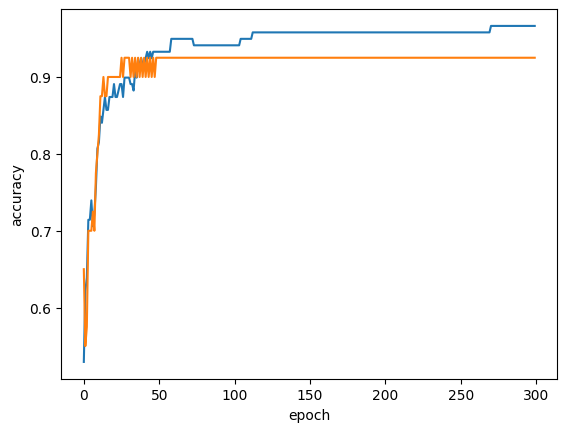

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_score)   # 훈련세트 점수
plt.plot(test_score)    # 테스트세트 점수
plt.xlabel('epoch')     # 에포크 횟수
plt.ylabel('accuracy')  # 정확도
plt.show()

In [28]:
# 결론 에포크 횟수를 100번 정도 돌리니 차트상으로 과대,과소적합이 아님(최상 good)
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # tol=None 조기종료 안함
# SGDClassifier 모델을 다시 생성
# loss='log_loss' → 로지스틱 회귀 방식으로 분류 수행
# max_iter=100 → 전체 데이터를 100번 반복 학습(=100 에포크)
# tol=None → 성능 향상이 멈춰도 조기 종료(Early Stopping) 하지 않음
# random_state=42 → 실행 결과를 항상 동일하게 유지

# 확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춤.

sc.fit(train_scaled, train_target)
# 훈련 데이터를 사용해 모델을 학습 시작
# 이번에는 partial_fit 반복이 아니라 fit()으로 한 번에 100 에포크 학습 수행
# 내부적으로 SGD 알고리즘이 100번 반복 학습함

print(sc.score(train_scaled, train_target)) # 95.79%
# 학습이 끝난 모델이 훈련 데이터에서 얼마나 정확한지 계산
# 약 95.79% 정확도로 훈련 데이터를 잘 맞추고 있음

print(sc.score(test_scaled, test_target))   # 92.5 %로 최적의 상태로 분석됨
# 테스트 데이터 정확도 측정 (진짜 모델 성능)
# 훈련 정확도와 큰 차이가 없으므로 과대적합이 거의 없는 좋은 모델 상태

0.957983193277311
0.925


In [29]:
sc.predict(test_scaled[:5])  # Perch Smelt Pike Perch Perch
# 테스트 데이터(test_scaled) 중 앞에서부터 5개 샘플만 가져옴
# [:5] 는 0~4번까지, 즉 처음 5개의 데이터를 의미
# predict()는 각 데이터가 어떤 클래스(어종)인지 예측 결과를 반환
# 결과 예: Perch, Smelt, Pike ... → 모델이 판단한 물고기 종류

proba = sc.predict_proba(test_scaled[:5])
# predict_proba()는 단순 예측 결과가 아니라
# "각 클래스일 확률"을 계산해서 반환함
# 즉, 모델이 얼마나 확신하고 있는지 숫자로 보여줌
# 결과는 2차원 배열 형태 (샘플 수 × 클래스 개수)

np.round(proba, decimals=3)
# 확률 값이 소수점이 길게 나오므로 보기 좋게 반올림
# decimals=3 → 소수점 셋째 자리까지 표시
# 예: 0.123456 → 0.123

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [30]:
sc.classes_
# 모델(sc)이 학습하면서 인식한 "전체 클래스(정답 종류)" 목록을 확인하는 속성
# 즉, 모델이 분류할 수 있는 어종들의 순서가 저장되어 있음

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [ ]:
# 손실함수에 대한 loss 매개변수

# loss 매개값의 기본값은 loss=hinge (힌지 손실) -> 서포트 백터 머신(SVM)이라고 불림
# SVM : 두 클래스를 가장 멀리 떨어지게 나누는 경계를 찾는 알고리즘
# 데이터를 선 하나로 나눈다고 생각해보자 여러 개의 선을 그릴 수 있지만 SVM은 이런 선을 고릅니다
# 두 클래스 사이의 간격(마진)이 가장 넓은 선

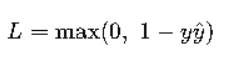

In [31]:
# loss='hinge'는 또다른 머신러닝 알고리즘을 위한 손실 함수이다.
# hinge 손실은 단순히 맞추는 게 아니라 결정 경계에서 충분히 멀리 떨어져 맞추길 원한다.
# "가장 안전하게 나누는 선"을 찾는 알고리즘입니다

sc_hinge = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
# SGDClassifier 모델을 새로 생성
# loss='hinge' → 서포트 벡터 머신(SVM) 방식의 손실함수를 사용
# 즉, 로지스틱 회귀가 아니라 "SVM 스타일 분류기"로 동작하게 됨
# max_iter=100 → 전체 데이터를 100번 반복 학습(100 에포크)
# tol=None → 성능 향상이 없어도 조기 종료하지 않고 끝까지 학습
# random_state=42 → 실행할 때마다 같은 결과 유지

sc_hinge.fit(train_scaled, train_target)
# 훈련 데이터를 사용해 모델 학습 시작
# SGD 방식으로 hinge loss(SVM 방식)를 최소화하도록 가중치를 업데이트함

print(sc_hinge.score(train_scaled, train_target))
# 훈련 데이터에서의 정확도 출력
# 모델이 학습 데이터를 얼마나 잘 맞추는지 확인

print(sc_hinge.score(test_scaled, test_target))
# 테스트 데이터 정확도 출력
# 새로운 데이터에 대한 실제 성능(일반화 능력)을 확인

0.9495798319327731
0.925


In [32]:
sc_hinge.predict(test_scaled[:5])  # Perch Smelt Pike Perch Perch
# 단 힌지 손실함수는 predict_proba()를 지원하지 않는다.
# proba = sc_hinge.predict_proba(test_scaled[:5])
# np.round(proba, decimals=3)
# test_scaled 데이터 중 앞에서 5개의 샘플만 선택
# [:5] 는 처음부터 5개 데이터(0~4번 인덱스)를 의미

# hinge loss(SVM 방식)로 학습된 모델이
# 각 샘플이 어떤 클래스(어종)인지 예측 결과를 반환

# 결과는 문자열 클래스 배열로 출력됨
# 예: ['Perch', 'Smelt', 'Pike', 'Perch', 'Perch']

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [33]:
sc_hinge.partial_fit(train_scaled, train_target)
# 기존에 이미 학습된 sc_hinge 모델을 "이어서 추가 학습"함
# fit()은 새로 처음부터 학습하지만,
# partial_fit()은 현재 가중치를 유지한 채 조금 더 학습함
# 즉, 모델이 기존 지식을 유지하면서 더 미세 조정되는 과정

print(sc_hinge.score(train_scaled, train_target))
# 추가 학습 후 훈련 데이터 정확도를 계산
# 모델이 학습 데이터에 얼마나 잘 맞는지 확인

print(sc_hinge.score(test_scaled, test_target))
# 추가 학습 후 테스트 데이터 정확도 계산
# 새로운 데이터에서도 잘 동작하는지(일반화 성능) 확인


0.907563025210084
0.925


In [35]:
from sklearn.metrics import hinge_loss
# hinge 손실값(loss)을 계산해주는 함수(평가용)를 불러옴
# SVM(hinge) 방식에서 “얼마나 틀렸는지(벌점)”를 숫자로 계산할 때 사용

train_score = []  # 매 epoch마다 훈련 정확도(accuracy)를 저장할 리스트
test_score = []  # 매 epoch마다 테스트 정확도(accuracy)를 저장할 리스트
train_loss = []  # 매 epoch마다 훈련 손실(loss)을 저장할 리스트
test_loss = []  # 매 epoch마다 테스트 손실(loss)을 저장할 리스트

classes = np.unique(train_target)
# 정답 라벨(어종)의 종류를 중복 없이 뽑아둠
# partial_fit을 처음 호출할 때 전체 클래스 목록을 알려줘야 해서 준비

sc_hinge_test = SGDClassifier(loss='hinge', max_iter=1, tol=None, random_state=42)
# hinge 손실을 쓰는 SGD 분류 모델 생성(SVM 스타일)
# max_iter=1 : fit()을 쓰면 1 epoch만 돌도록 하는 설정이지만,
# 지금은 partial_fit을 직접 반복하므로 “한 번 호출 = 한 번 업데이트” 느낌으로 보면 됨
# tol=None : 조기종료 없이 계속 학습
# random_state=42 : 결과 재현 가능하게 고정

for _ in range(300): # 300번 반복하며 점점 학습(= epoch을 늘려가는 효과)
    sc_hinge_test.partial_fit(train_scaled, train_target, classes=classes)
    # 기존 모델을 유지한 채 “추가 학습”
    # 호출할 때마다 가중치가 조금 업데이트됨(SGD 핵심)

    # accuracy
    train_score.append(sc_hinge_test.score(train_scaled, train_target))
    test_score.append(sc_hinge_test.score(test_scaled, test_target))
    # 현재 모델의 훈련 정확도를 계산해서 리스트에 저장
    # 현재 모델의 테스트 정확도를 계산해서 리스트에 저장
    # 이게 진짜 실력(일반화 성능)

    # loss
    train_decision = sc_hinge_test.decision_function(train_scaled)
    test_decision = sc_hinge_test.decision_function(test_scaled)
    # 훈련 데이터에 대한 “결정 점수(decision score)”를 구함
    # hinge(SVM)에서는 확률이 아니라, 경계에서 얼마나 떨어졌는지 점수로 판단함
    # 값이 크면 그 클래스 쪽으로 강하게 확신, 0 근처면 애매, 음수면 반대쪽
    # 테스트 데이터에 대한 결정 점수를 구함(훈련과 같은 방식)


    train_loss.append(hinge_loss(train_target, train_decision))
    test_loss.append(hinge_loss(test_target, test_decision))
    # 훈련 정답(train_target)과 결정 점수(train_decision)를 비교해서
    # hinge loss(벌점)가 얼마나 되는지 계산하고 저장
    # loss는 “낮을수록 좋음” (accuracy는 “높을수록 좋음”)
    # 테스트에서도 hinge loss를 계산해서 저장
    # test_loss가 내려가다가 다시 올라가면 → 과대적합 신호일 수 있음


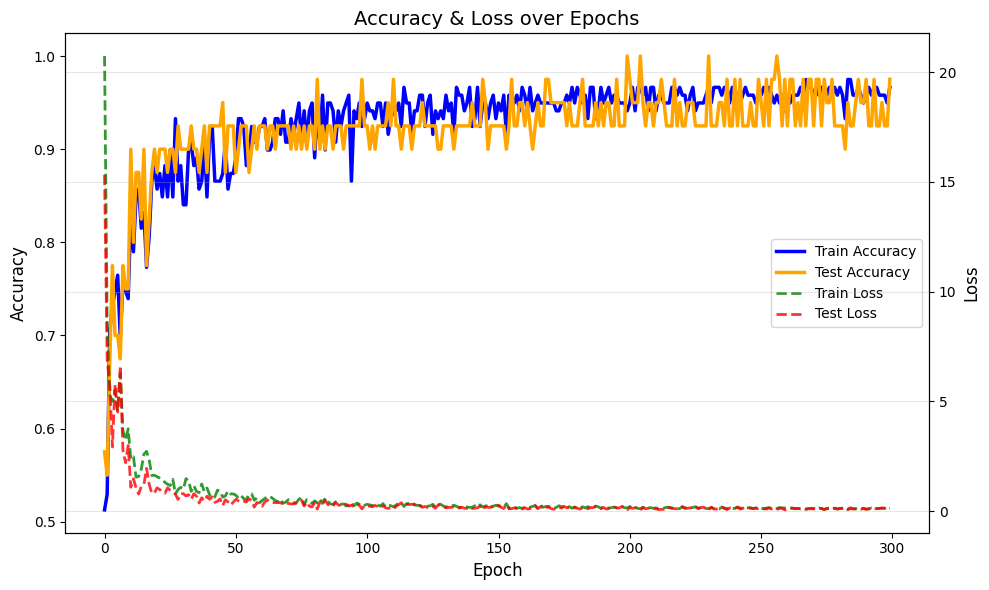

In [36]:
fig, ax1 = plt.subplots(figsize=(10,6))
# 그래프 영역(figure)과 첫 번째 축(ax1)을 생성
# figsize=(10,6)은 가로 10, 세로 6 크기의 그래프 설정

# Accuracy (왼쪽 축)
ax1.plot(train_score,
         color='blue',
         linewidth=2.5,
         label='Train Accuracy')
# epoch마다 저장한 훈련 정확도를 파란색 선으로 그림
# linewidth는 선 두께 (2.5 → 조금 두껍게)
# label은 범례(legend)에 표시될 이름

ax1.plot(test_score,
         color='orange',
         linewidth=2.5,
         label='Test Accuracy')
# 테스트 정확도를 주황색 선으로 그림
# 모델의 실제 성능 변화를 보여주는 가장 중요한 선

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.tick_params(axis='y')
# x축 이름을 Epoch(학습 반복 횟수)로 설정
# 왼쪽 y축을 Accuracy(정확도)로 설정
# y축 눈금 스타일 기본 설정 (가독성 유지용)


# Loss (오른쪽 축)
ax2 = ax1.twinx()
# 같은 x축을 공유하지만 다른 y축을 사용하는 두 번째 축 생성
# Accuracy와 Loss를 한 그래프에 동시에 표현하기 위해 사용

ax2.plot(train_loss,
         color='green',
         linestyle='--',
         linewidth=2,
         alpha=0.8,
         label='Train Loss')
# 훈련 손실(loss)을 초록색 점선으로 그림
# linestyle='--' → 점선
# alpha=0.8 → 약간 투명하게 표시

ax2.plot(test_loss,
         color='red',
         linestyle='--',
         linewidth=2,
         alpha=0.8,
         label='Test Loss')
# 테스트 손실을 빨간 점선으로 그림
# loss는 낮을수록 좋은 모델 상태 의미

ax2.set_ylabel('Loss', fontsize=12) # 오른쪽 y축 이름을 Loss로 설정

# 범례 합치기
lines1, labels1 = ax1.get_legend_handles_labels()  # Accuracy 그래프의 선과 라벨 정보 가져오기
lines2, labels2 = ax2.get_legend_handles_labels()  # Loss 그래프의 선과 라벨 정보 가져오기
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
# 두 축의 범례를 합쳐서 하나의 legend로 표시
# 그래프 오른쪽 중앙 위치에 배치

plt.title('Accuracy & Loss over Epochs', fontsize=14)  # 그래프 제목 설정
plt.grid(alpha=0.3)  # 배경 격자 추가 (투명도 0.3 → 은은하게)
plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 자동 정렬
plt.show()

In [ ]:
# 조기종료 지점 찾아보기 (Early Stopping)
# test loss가 가장 낮은 epoch 또는 test loss가 patience 횟수만큼 연속 증가하면 멈춤
# minL(test) : test loss가 더 이상 감소하지 않는 시점을 찾습니다.

In [37]:
patience = 10
# 성능이 좋아지지 않아도 몇 번까지 기다릴지 설정
# 여기서는 10 epoch 동안 개선이 없으면 학습 중단

best_loss = float('inf')
# 지금까지 본 테스트 손실(loss) 중 가장 좋은 값을 저장
# 처음에는 무한대로 설정해서 첫 값이 무조건 갱신되게 함

patience_counter = 0  # 성능 개선이 안 된 횟수를 세는 카운터
early_stop_epoch = 0  # Early stopping이 발생한 epoch을 기록하기 위한 변수

train_score_early = []  # epoch마다 훈련 정확도 저장
test_score_early = []   # epoch마다 테스트 정확도 저장
train_loss_early = []   # epoch마다 훈련 loss 저장
test_loss_early = []    # epoch마다 테스트 loss 저장

sc_hinge_test_early = SGDClassifier(loss='hinge', max_iter=1, tol=None, random_state=42)
# hinge loss(SVM 방식) 사용
# max_iter=1 → partial_fit을 직접 반복하며 epoch 제어
# tol=None → sklearn 내부 조기종료 기능 OFF (우리가 직접 구현)

for epoch in range(300):
    sc_hinge_test_early.partial_fit(train_scaled, train_target, classes=classes)
    # 기존 모델을 유지한 채 한 번 더 학습
    # 호출 1회 = epoch 1회 증가 효과

    # accuracy 저장
    train_score_early.append(sc_hinge_test_early.score(train_scaled, train_target))
    test_score_early.append(sc_hinge_test_early.score(test_scaled, test_target))
    # 현재 모델의 훈련 정확도 기록
    # 테스트 정확도 기록 (진짜 성능 판단 기준)

    # loss 계산
    train_decision_early = sc_hinge_test_early.decision_function(train_scaled)
    test_decision_early = sc_hinge_test_early.decision_function(test_scaled)
    # 훈련 데이터의 결정 점수 계산
    # SVM에서는 확률 대신 “경계에서의 거리” 사용
    # 테스트 데이터 결정 점수 계산

    current_test_loss = hinge_loss(test_target, test_decision_early)
    train_loss_early.append(hinge_loss(train_target, train_decision_early))
    test_loss_early.append(current_test_loss)
    # 현재 epoch의 테스트 손실 계산
    # Early stopping 판단 기준이 되는 핵심 값
    # 훈련 손실 저장
    # 테스트 손실 저장

    # Early Stopping 체크
    if current_test_loss < best_loss:
        best_loss = current_test_loss  # 최고 성능 갱신
        patience_counter = 0           # 개선됐으므로 기다림 카운터 초기화
        early_stop_epoch = epoch       # 가장 좋았던 epoch 기록
    else:
        patience_counter += 1          # 성능 개선이 없으면 카운트 증가

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

Early stopping at epoch 23


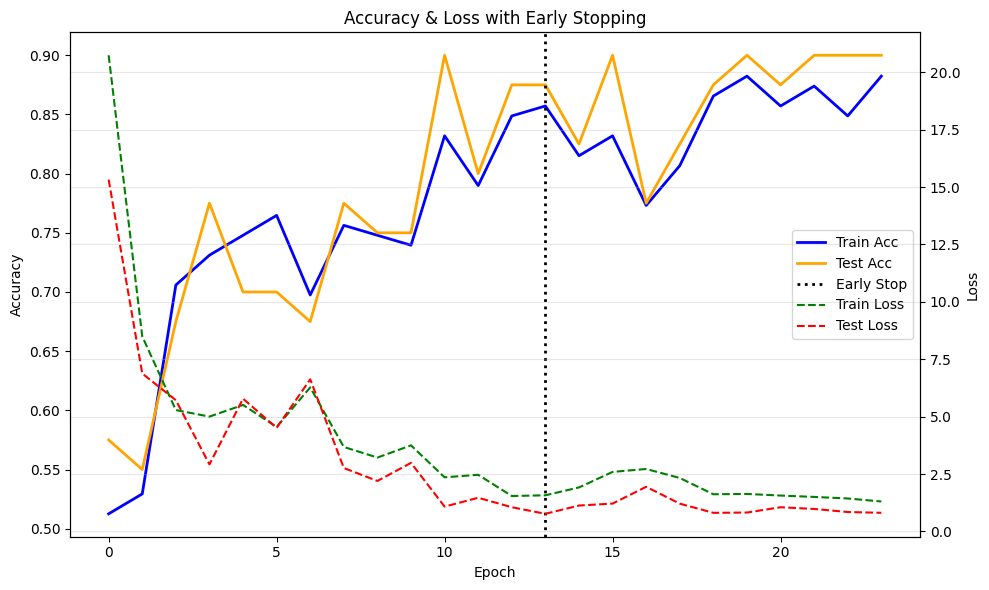

In [39]:
fig, ax1 = plt.subplots(figsize=(10,6))
# 그래프 영역과 첫 번째 축(ax1)을 생성
# figsize=(10,6) → 가로형 분석 그래프 크기 설정

# Accuracy
ax1.plot(train_score_early, color='blue', linewidth=2, label='Train Acc')
# epoch마다 기록한 훈련 정확도를 파란색 선으로 그림
# 학습 데이터에 대한 모델 적합 정도
ax1.plot(test_score_early, color='orange', linewidth=2, label='Test Acc')
# 테스트 정확도를 주황색 선으로 그림
# 실제 모델 성능을 판단하는 핵심 지표

# Early stopping 세로선
ax1.axvline(x=early_stop_epoch,
            color='black',
            linestyle=':',
            linewidth=2,
            label='Early Stop')

ax1.set_xlabel('Epoch')  # x축 이름 설정 (학습 반복 횟수)
ax1.set_ylabel('Accuracy')  # 왼쪽 y축 = 정확도

# Loss
ax2 = ax1.twinx()
# 동일한 x축을 공유하지만 다른 y축을 사용하는 두 번째 축 생성
# Accuracy와 Loss를 동시에 표현 가능

ax2.plot(train_loss_early, color='green', linestyle='--', label='Train Loss')
# 훈련 손실을 초록 점선으로 표시
# 학습이 진행될수록 보통 감소

ax2.plot(test_loss_early, color='red', linestyle='--', label='Test Loss')
# 테스트 손실을 빨간 점선으로 표시
# 과대적합 시작 시 다시 상승하는 패턴이 나타남

ax2.set_ylabel('Loss')
# 오른쪽 y축 이름 = Loss

# 범례 통합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
# Accuracy 그래프의 선/라벨 정보 가져오기
# Loss 그래프의 선/라벨 정보 가져오기
# 두 축의 범례를 하나로 합쳐 오른쪽 중앙에 표시

plt.title('Accuracy & Loss with Early Stopping')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#     📊 데이터 준비
#     (학습 재료 수집)
#             ↓
#     🐟 특징(X) / 정답(y) 분리
#     입력과 정답 나누기
#             ↓
#     ⚖️ 데이터 전처리 (스케일링)
#     SGD가 안정적으로 학습하도록 크기 정규화
#             ↓
#     🤖 모델 선택
#     SGDClassifier
#     (log_loss = 로지스틱 회귀 기반)
#             ↓
#     ⛰️ 학습 시작 (경사하강법)
#     오차 계산 → 가중치 수정
#             ↓
#     🔁 Epoch 반복 학습
#     데이터 여러 번 반복 학습
#             ↓
#     📈 성능 검증
#     train_score vs test_score 비교
#             ↓
#     🎯 최적 epoch 선택
#     과소적합 ❌ 과대적합 ❌
#             ↓
#     🏆 최종 모델 학습
#      최적 반복 횟수로 재훈련
#             ↓
#     🔮 예측 (predict)
#     가장 높은 확률 클래스 선택
#             ↓
#     📊 확률 확인 (predict_proba)
#     각 클래스 확신도 확인
#             ↓
#     ✅ 결과 해석 (classes_)
#     확률과 실제 클래스 매칭